# Build charts for all the states.

In [166]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df_pop = pd.read_csv('./data/populations_vs_state.csv')

The in the state-by-state data COVID-19 data, the state is is listed with it's 2-letter postal code.  To facilitate continuing analysis, we therefore build a Python `dict` for easy lookup.

In [24]:
df = df_pop.set_index('state')
population = {df.at[s, 'postal_code']:df.at[s, 'population'] for s in df.index}
# populations

Next read in the state-by-state historical data.

In [28]:
urls = [#'https://covidtracking.com/api/states.csv',
        'http://covidtracking.com/api/states/daily.csv',
        # https://covidtracking.com/api/states/info.csv
        # 'https://covidtracking.com/api/us/daily.csv',
       ]

df = [pd.read_csv(url, parse_dates=True) for url in urls][0]
df

,date,state,positive,negative,pending,hospitalized,death,total,hash,dateChecked,totalTestResults,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,20200328,AK,85.0,2836.0,NaN,5.0,2.0,2921,edb7e6bcde715f8bbea31547e99aa8b4712ea5fb,2020-03-28T20:00:00Z,2921,2,1.0,2.0,517.0,16.0,533.0
1,20200328,AL,696.0,4184.0,NaN,NaN,3.0,4880,c9986a845bd2f8f9c9a4294a8e5d66a01ee6aadf,2020-03-28T20:00:00Z,4880,1,0.0,0.0,0.0,109.0,109.0
2,20200328,AR,404.0,2938.0,0.0,48.0,5.0,3342,47d05acbbf2fbb56ddd9c44c3b9e204d10f050c3,2020-03-28T20:00:00Z,3342,5,2.0,0.0,1393.0,23.0,1416.0
3,20200328,AS,0.0,NaN,0.0,NaN,0.0,0,c6fae61e10e1a1154e848a52a3665304ec76dd53,2020-03-28T20:00:00Z,0,60,0.0,0.0,0.0,0.0,0.0
4,20200328,AZ,873.0,7455.0,21.0,NaN,15.0,8349,9b04c4c073cb904f606bb9efb2ac77c8ecc810cd,2020-03-28T20:00:00Z,8328,4,2.0,0.0,0.0,137.0,137.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,20200304,OR,3.0,29.0,18.0,NaN,NaN,50,5b37d7f2e6aa9fb39e09270626674b16ce9b5182,2020-03-04T21:00:00Z,32,41,NaN,NaN,NaN,NaN,NaN
1257,20200304,SC,0.0,5.0,0.0,NaN,NaN,5,992c7ca6f8259ac7a323c0b92c27123c671f3773,2020-03-04T21:00:00Z,5,45,NaN,NaN,NaN,NaN,NaN
1258,20200304,TX,1.0,NaN,NaN,NaN,NaN,1,7be175c20e3c9485c14f9764bd90385842df19c3,2020-03-04T21:00:00Z,1,48,NaN,NaN,NaN,NaN,NaN
1259,20200304,WA,39.0,NaN,NaN,NaN,NaN,39,36ea36bcf282dcc480c83b6f2561810b009bc951,2020-03-04T21:00:00Z,39,53,NaN,NaN,NaN,NaN,NaN


In [45]:
dfp = df[['date', 'state', 'positive', 'negative', 'pending', 'hospitalized', 'death', 'total', 'dateChecked']].copy()
dfp

,date,state,positive,negative,pending,hospitalized,death,total,dateChecked
0,20200328,AK,85.0,2836.0,NaN,5.0,2.0,2921,2020-03-28T20:00:00Z
1,20200328,AL,696.0,4184.0,NaN,NaN,3.0,4880,2020-03-28T20:00:00Z
2,20200328,AR,404.0,2938.0,0.0,48.0,5.0,3342,2020-03-28T20:00:00Z
3,20200328,AS,0.0,NaN,0.0,NaN,0.0,0,2020-03-28T20:00:00Z
4,20200328,AZ,873.0,7455.0,21.0,NaN,15.0,8349,2020-03-28T20:00:00Z
...,...,...,...,...,...,...,...,...,...
1256,20200304,OR,3.0,29.0,18.0,NaN,NaN,50,2020-03-04T21:00:00Z
1257,20200304,SC,0.0,5.0,0.0,NaN,NaN,5,2020-03-04T21:00:00Z
1258,20200304,TX,1.0,NaN,NaN,NaN,NaN,1,2020-03-04T21:00:00Z
1259,20200304,WA,39.0,NaN,NaN,NaN,NaN,39,2020-03-04T21:00:00Z


In [47]:
dfp['date'] = pd.to_datetime(dfp.date, format='%Y%m%d')
dfp

,date,state,positive,negative,pending,hospitalized,death,total,dateChecked
0,2020-03-28,AK,85.0,2836.0,NaN,5.0,2.0,2921,2020-03-28T20:00:00Z
1,2020-03-28,AL,696.0,4184.0,NaN,NaN,3.0,4880,2020-03-28T20:00:00Z
2,2020-03-28,AR,404.0,2938.0,0.0,48.0,5.0,3342,2020-03-28T20:00:00Z
3,2020-03-28,AS,0.0,NaN,0.0,NaN,0.0,0,2020-03-28T20:00:00Z
4,2020-03-28,AZ,873.0,7455.0,21.0,NaN,15.0,8349,2020-03-28T20:00:00Z
...,...,...,...,...,...,...,...,...,...
1256,2020-03-04,OR,3.0,29.0,18.0,NaN,NaN,50,2020-03-04T21:00:00Z
1257,2020-03-04,SC,0.0,5.0,0.0,NaN,NaN,5,2020-03-04T21:00:00Z
1258,2020-03-04,TX,1.0,NaN,NaN,NaN,NaN,1,2020-03-04T21:00:00Z
1259,2020-03-04,WA,39.0,NaN,NaN,NaN,NaN,39,2020-03-04T21:00:00Z


In [86]:
state = 'WA'
select = dfp['state'] == state
dfpp = dfp[select]
dfpp.head()

,date,state,positive,negative,pending,hospitalized,death,total,dateChecked
52,2020-03-28,WA,3723.0,49015.0,NaN,254.0,175.0,52738,2020-03-28T20:00:00Z
108,2020-03-27,WA,3207.0,43173.0,NaN,NaN,147.0,46380,2020-03-27T20:00:00Z
164,2020-03-26,WA,2580.0,31712.0,NaN,NaN,132.0,34292,2020-03-26T20:00:00Z
220,2020-03-25,WA,2469.0,31712.0,NaN,NaN,123.0,34181,2020-03-25T20:00:00Z
276,2020-03-24,WA,2221.0,31712.0,NaN,NaN,110.0,33933,2020-03-24T20:00:00Z


Wall time: 0 ns


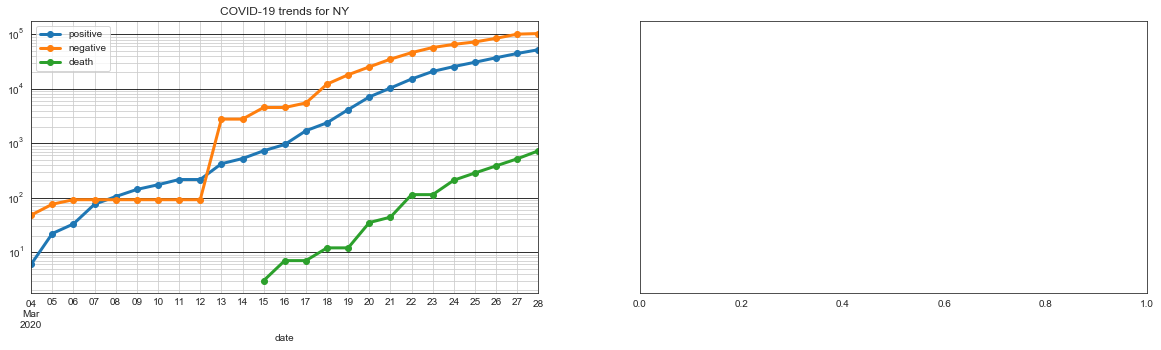

In [172]:
%time
fig, axs = plt.subplots(1,2,sharey=True, figsize=(20,10))
state = 'NY'
select = dfp['state'] == state
dfpp = dfp[select]
plot = dfpp.plot(x='date', y=['positive', 'negative', 'death'], ax = axs[0],
    grid='both', logy=True, style='o-', linewidth=3, figsize=(20,5),
    title='COVID-19 trends for {}'.format(state),)

# plot.grid(which='minor', axis='x', color='r')
plot.grid(True, which='minor', axis='both')
plot.grid(True, which='major', axis='y', color='black')


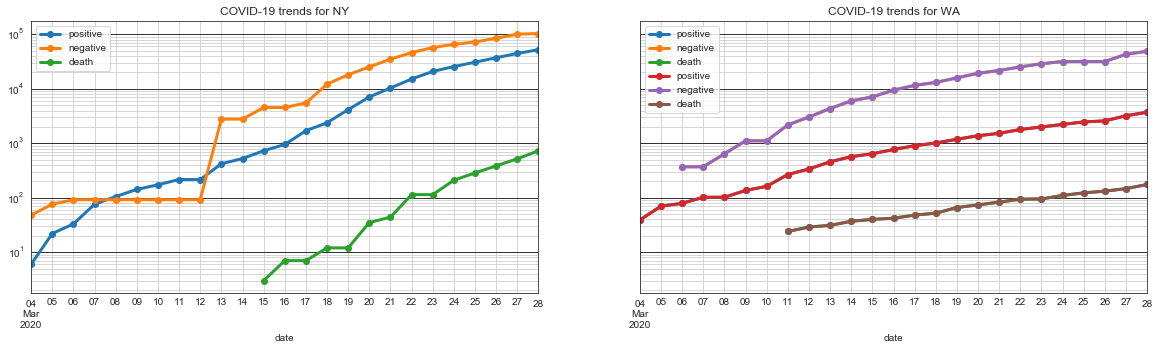

In [174]:
state = 'WA'
select = dfp['state'] == state
dfpp = dfp[select]
plot = dfpp.plot(x='date', y=['positive', 'negative', 'death'], ax = axs[1],
    grid='both', logy=True, style='o-', linewidth=3, figsize=(20,5),
    title='COVID-19 trends for {}'.format(state),)

# plot.grid(which='minor', axis='x', color='r')
plot.grid(True, which='minor', axis='both')
plot.grid(True, which='major', axis='y', color='black')
plot.figure

## All together now.

0 WA
1 OR
2 NY


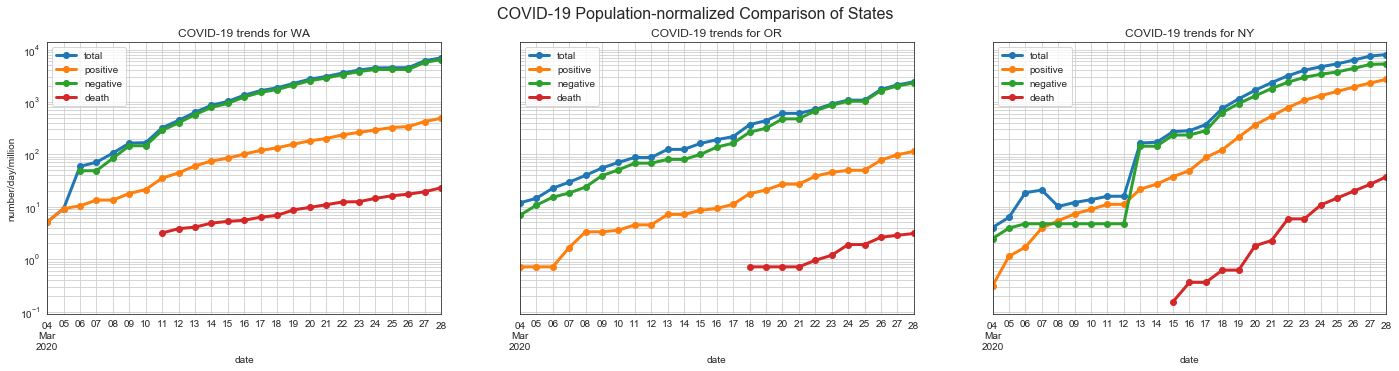

In [295]:
states = ['WA', 'OR', 'NY']
toNorm = ['total', 'positive', 'negative', 'death']
fig, axs = plt.subplots(nrows=1, ncols=len(states), figsize=(20,5), sharey=True, sharex=True)
fig.suptitle('COVID-19 Population-normalized Comparison of States', fontsize=16)

for iAxis, state in enumerate(states):
    print (iAxis, state)
    select = dfp['state'] == state
    dfpp = dfp[select]
    
    df_norm = dfpp[toNorm]/population[state]*1e6
    plot = df_norm.set_index(dfpp['date']).plot(y=['total', 'positive', 'negative', 'death'], ax = axs[iAxis],
        grid='both', logy=True, style='o-', linewidth=3, figsize=(24,5),
        title='COVID-19 trends for {}'.format(state),)

    plot.grid(True, which='minor')
    plot.set_ylabel('number/day/million')

In [296]:
fig.savefig('./images/COVID-10_norm_WA_OR_NY.png')

Wall time: 0 ns


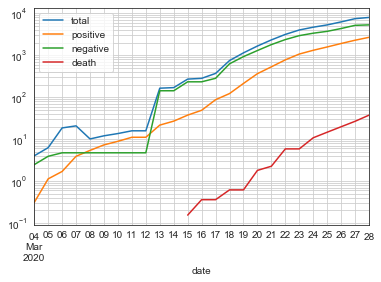

In [282]:
%time
toNorm = ['total', 'positive', 'negative', 'death']
df_norm = dfpp[toNorm]/population[state]*1e6
plot = df_norm.set_index(dfpp['date']).plot(logy=True, grid='both')

plot.grid(True, which='minor')
plot

Here is an attempt to bold the week markers.

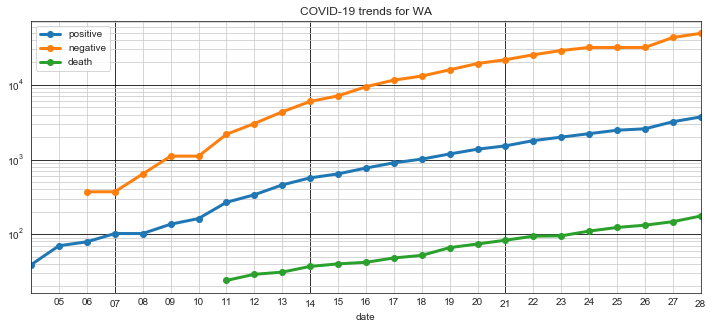

In [161]:
# Grid on sunday
import matplotlib.dates as mdates
weeks = mdates.WeekdayLocator()
weeksFmt = mdates.DateFormatter('%d')

def set_grid(plot):
    plot.xaxis.set_major_formatter(weeksFmt)
    plot.xaxis.set_major_locator(weeks)
    plot.grid(True, which='major', axis='x', color='black')

set_grid(plot)
plot.figure

## (delete this section) Now try it with `seaborn`

In [85]:
import seaborn as sns
sns.set_style('white')

[None]

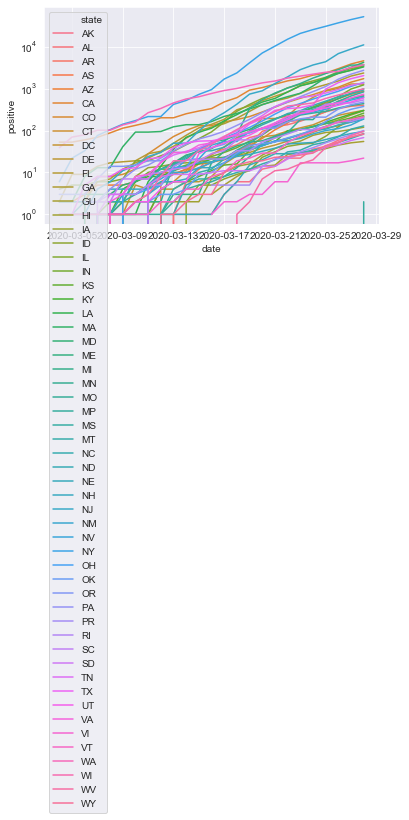

In [84]:
ax = sns.lineplot(x='date', y='positive', data=dfp, hue='state')
ax.set(yscale='log')